---
# Setup

* imports, 
* global constants (paths, time format, order of conditions)

---

In [1]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

---
# Load Data

* load tracking data
* convert date time
* compute durations
* compute condition-based index
---

In [2]:
data_complete = pd.read_csv(rf'{export_data}data_all.csv', sep=";")

display(data_complete)

,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer03,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker
0,2022-08-01 13:58:38.416,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,NaN,NaN,NaN,START_BLOCK | START_TRAINING
1,2022-08-01 13:58:38.448,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
2,2022-08-01 13:58:38.477,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
3,2022-08-01 13:58:38.508,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
4,2022-08-01 13:58:38.541,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371627,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371628,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371629,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371630,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-


In [3]:
data_experiment = pd.read_csv(rf'{export_data}data_experiment.csv', sep=";")

display(data_experiment)

,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer03,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker
0,2022-08-01 14:12:39.590,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,-2.0,1.0,-1.0,START_BLOCK | START_EXPERIMENT
1,2022-08-01 14:12:39.635,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
2,2022-08-01 14:12:39.651,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
3,2022-08-01 14:12:39.683,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
4,2022-08-01 14:12:39.696,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890534,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890535,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890536,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890537,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-


# Compute frametimes



In [7]:
def computeFrameTimes(data):
    frameStats = pd.DataFrame(pd.to_datetime(data["Date"]).diff().dt.microseconds / 1000.0)
    display(frameStats)

    descStats = frameStats.describe()

    display(descStats.apply(lambda s: s.apply('{0:.5f}'.format)))

    data["FrameStats"] = frameStats

    return frameStats, descStats

In [ ]:
def createPlot(data, framestats, descstats, filename):
    outliers_threshold = 99.0

    outliers = data[data["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

    display(outliers)

    y_mean = [descstats["Date"][1]] * len(framestats)
    outliers_threshold_line = [outliers_threshold] * len(framestats)

    fig,ax = plt.subplots(figsize=(25,8))

    ax.plot(framestats.index, framestats["Date"], label='Frame Duration (ms)')
    ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
    ax.plot(framestats.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

    ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

    legend = ax.legend(loc='upper right')

    plt.yticks(np.arange(0, descstats["Date"][7], 100))


    fig.savefig(rf'{export_img}{filename}.png')
    fig.savefig(rf'{export_img}{filename}.svg')

    plt.show()

,Date
0,NaN
1,32.0
2,29.0
3,31.0
4,33.0
...,...
3371627,31.0
3371628,31.0
3371629,32.0
3371630,31.0


,Date
count,3371631.00000
mean,30.03119
std,6.62419
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,955.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3099470,22,-4,0,-8,3,0,708.0
3339288,23,2,17,59,4,1,110.0


390


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

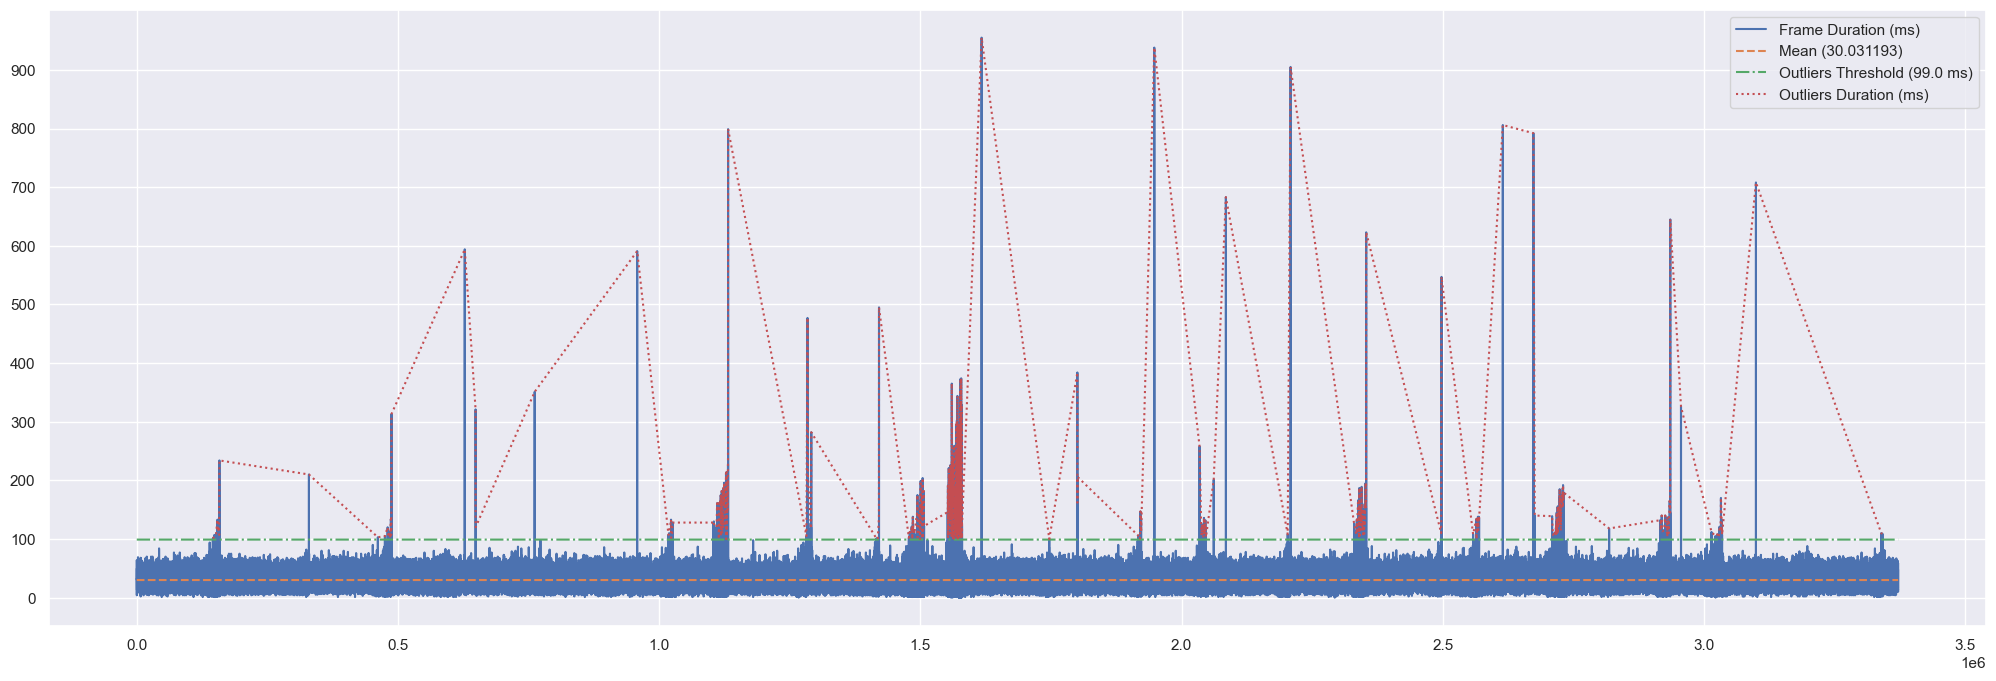

In [11]:
frameStats_complete, descStats_complete = computeFrameTimes(data_complete)

createPlot(data_complete, frameStats_complete, descStats_complete, 'frametimes_complete.png')

,Date
count,2.688171e+06
mean,3.003014e+01
std,6.502516e+00
min,0.000000e+00
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
max,3.740000e+02


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034412,21,1,20,41,4,1,116.0
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3339288,23,2,17,59,4,1,110.0


350


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

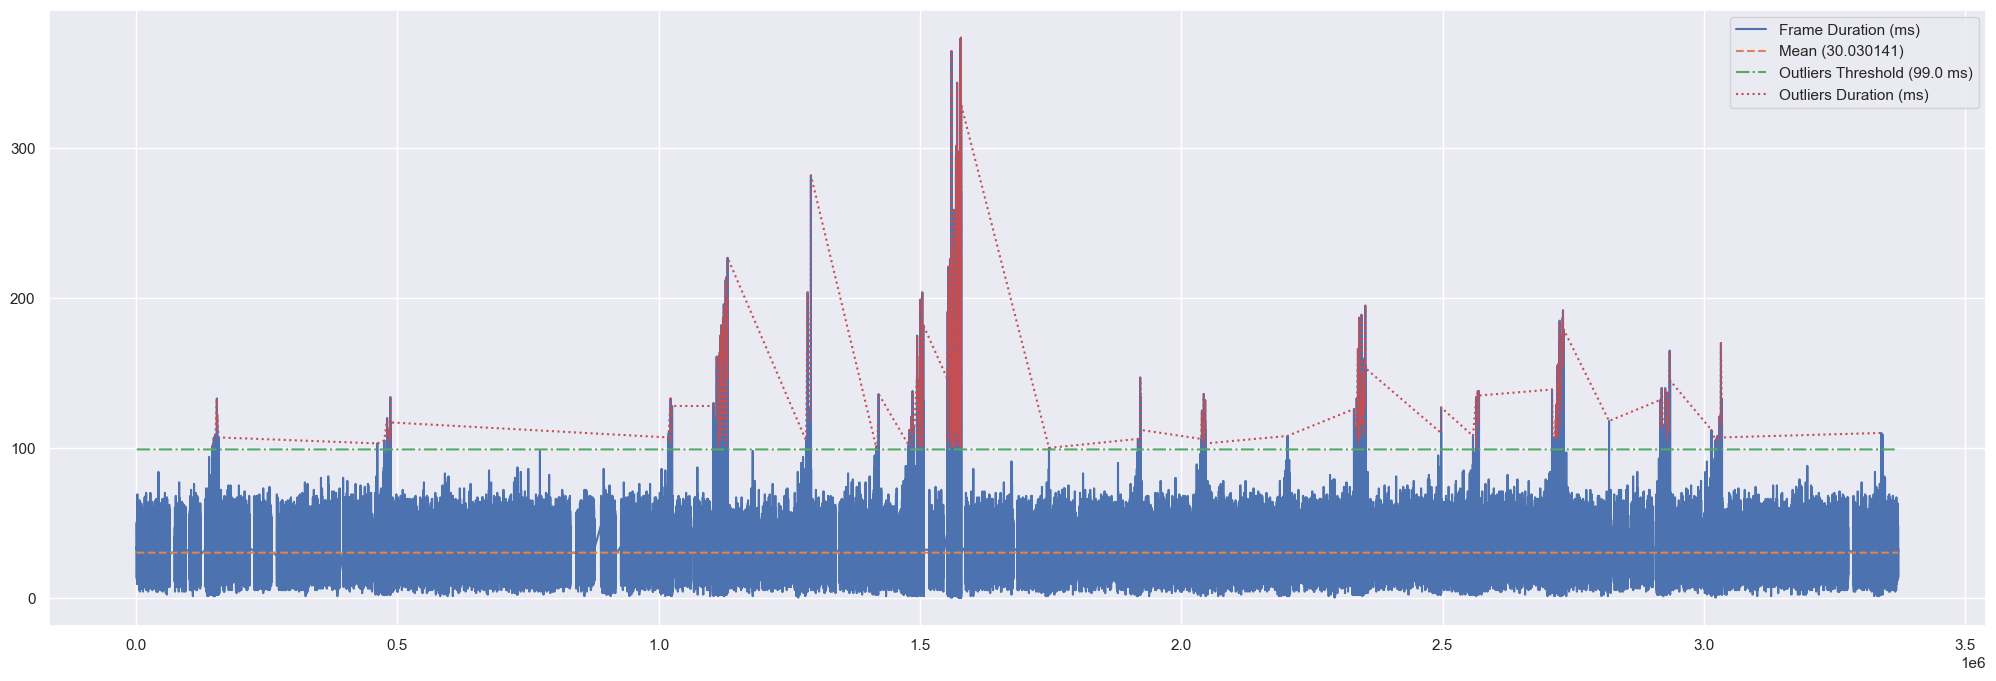

In [12]:
data_interaction = data_complete[data_complete['ProgramSubState'] == 1]

frameStats_interaction = pd.DataFrame()
frameStats_interaction['Date'] = data_interaction['FrameStats']

descStats_interaction = frameStats_interaction.describe()
display(descStats_interaction)

createPlot(data_interaction, frameStats_interaction, descStats_interaction, 'frametimes_interaction.png')

,Date
0,NaN
1,45.0
2,16.0
3,32.0
4,13.0
...,...
2890534,31.0
2890535,31.0
2890536,32.0
2890537,31.0


,Date
count,2890538.00000
mean,30.03452
std,6.73697
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,938.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
117618,2,3,11,74,4,1,101.0
119502,2,3,12,75,4,1,103.0
120643,2,3,13,76,4,1,107.0
123784,2,3,16,79,4,1,109.0
126453,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
2588670,21,1,20,41,4,1,117.0
2588748,21,1,20,41,4,1,107.0
2653647,22,0,0,0,4,0,190.0
2858195,23,2,17,59,4,1,110.0


387


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1437159023.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

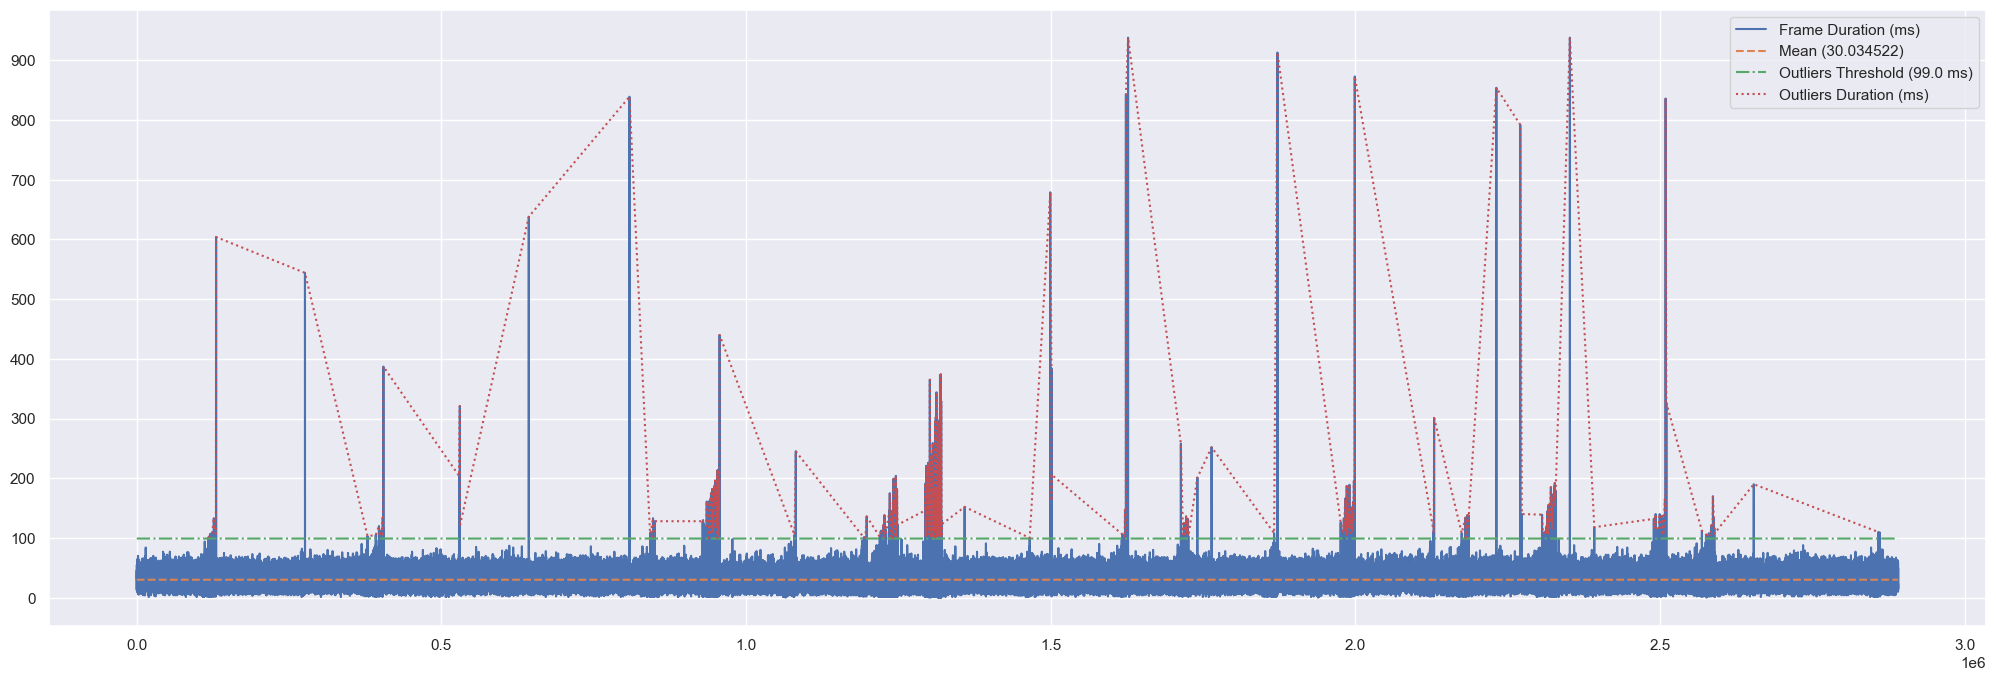

In [13]:

frameStats_experiment, descStats_experiment = computeFrameTimes(data_experiment)

createPlot(data_experiment, frameStats_experiment, descStats_experiment, 'frametimes_experiment.png')

In [16]:
def computeCI(df, m= 'mean', c='count', s='std'):
    df['ci95_hi'] = df[m] + 1.96*df[s]/(df[c].apply(np.sqrt))
    df['ci95_lo'] = df[m] - 1.96*df[s]/(df[c].apply(np.sqrt))

def computeWhiskers(df, desc, col_names, q1='25%', q3='75%'):
    desc['iqr'] = desc[q3] - desc[q1]

    # Whisker-Berechnung (innerhalb 1.5 * IQR)
    desc['lower_bound'] = desc[q1] - 1.5 * desc['iqr']
    desc['upper_bound'] = desc[q3] + 1.5 * desc['iqr']    

    lower_whiskers = []
    upper_whiskers = []

    for col_name in col_names:
        lower_bound = desc['lower_bound'].T[col_name]
        upper_bound = desc['upper_bound'].T[col_name]

        # Whiskers sind die letzten Punkte innerhalb dieser Grenzen
        l = df[df[col_name] >= lower_bound][col_name].min()
        u = df[df[col_name] <= upper_bound][col_name].max()

        lower_whiskers.append(l)
        upper_whiskers.append(u)

    desc['lower_whisker'] = lower_whiskers
    desc['upper_whisker'] = upper_whiskers

In [25]:
desc_interaction = pd.DataFrame(descStats_interaction['Date']).T

computeCI(desc_interaction)

display(desc_interaction.T)

,Date
count,2.688171e+06
mean,3.003014e+01
std,6.502516e+00
min,0.000000e+00
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
max,3.740000e+02
ci95_hi,3.003791e+01
ci95_lo,3.002237e+01


In [26]:
desc_complete = pd.DataFrame(descStats_complete['Date']).T

computeCI(desc_complete)

display(desc_complete.T)

,Date
count,3.371631e+06
mean,3.003119e+01
std,6.624187e+00
min,0.000000e+00
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
max,9.550000e+02
ci95_hi,3.003826e+01
ci95_lo,3.002412e+01


# deprecated

,Date
0,NaN
1,32.0
2,29.0
3,31.0
4,33.0
...,...
3371627,31.0
3371628,31.0
3371629,32.0
3371630,31.0


,Date
count,3371631.00000
mean,30.03119
std,6.62419
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,955.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3099470,22,-4,0,-8,3,0,708.0
3339288,23,2,17,59,4,1,110.0


390


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1859358598.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [desc_stats["Date"][1]] * len(frameStats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1859358598.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(frameStats.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/1859358598.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

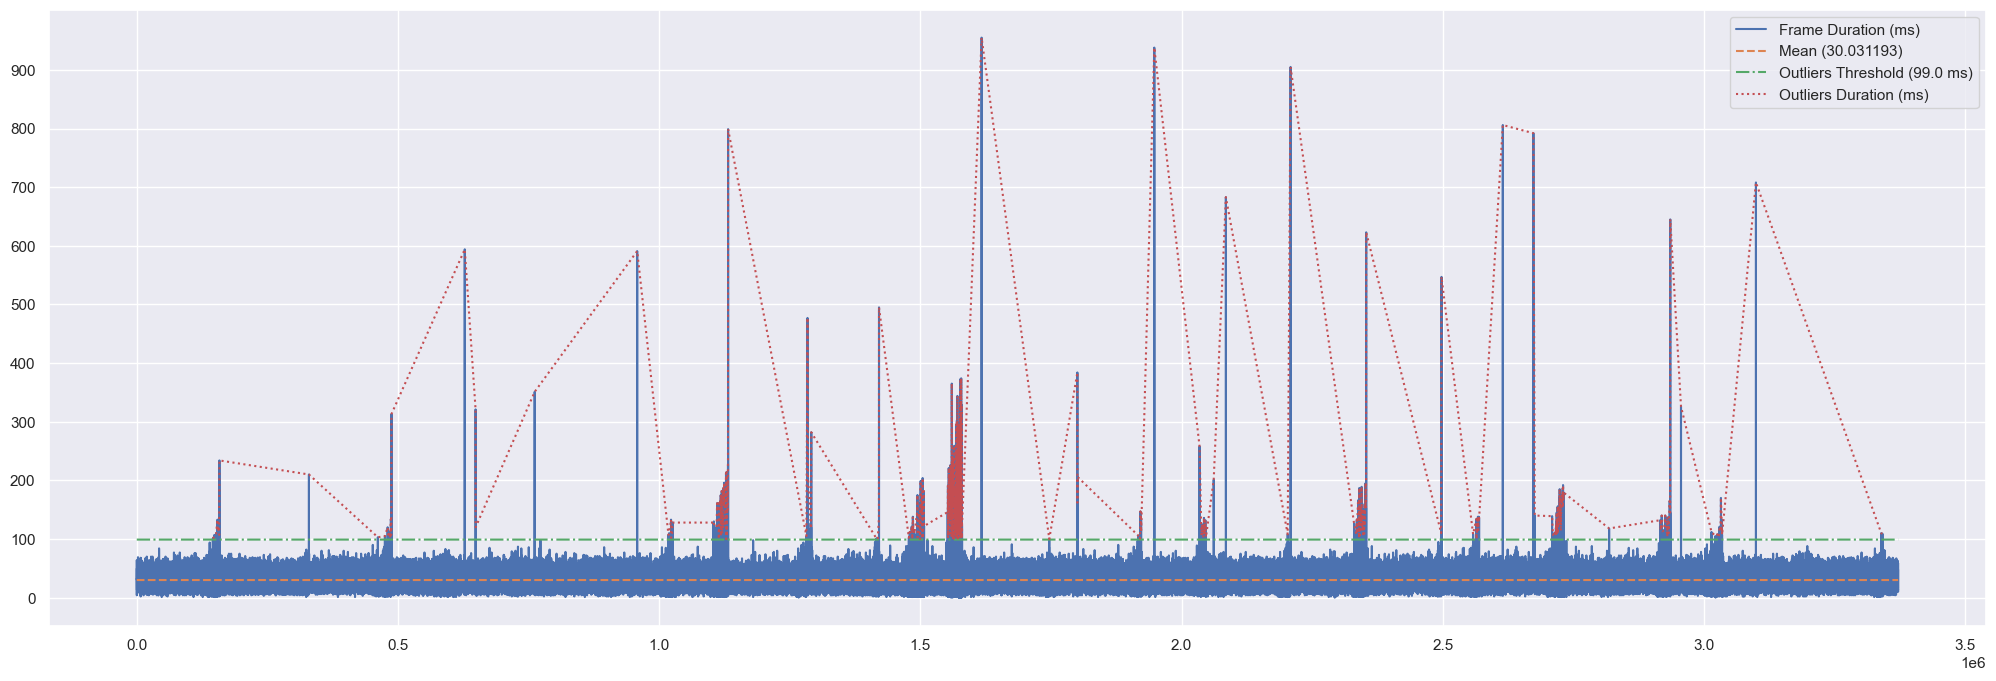

In [14]:
frameStats = pd.DataFrame(pd.to_datetime(data_complete["Date"]).diff().dt.microseconds / 1000.0)

display(frameStats)

desc_stats = frameStats.describe()

display(desc_stats.apply(lambda s: s.apply('{0:.5f}'.format)))

data_complete["FrameStats"] = frameStats

outliers_threshold = 99.0

outliers = data_complete[data_complete["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats["Date"][1]] * len(frameStats)
outliers_threshold_line = [outliers_threshold] * len(frameStats)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats.index, frameStats["Date"], label='Frame Duration (ms)')
ax.plot(frameStats.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes.png')
fig.savefig(rf'{export_img}frameTimes.svg')

plt.show()

,FrameStats
count,2688171.00000
mean,30.03014
std,6.50252
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,374.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034412,21,1,20,41,4,1,116.0
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3339288,23,2,17,59,4,1,110.0


350


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/2117645569.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [desc_stats2["FrameStats"][1]] * len(frameStats2)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/2117645569.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(frameStats2.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_75006/2117645569.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

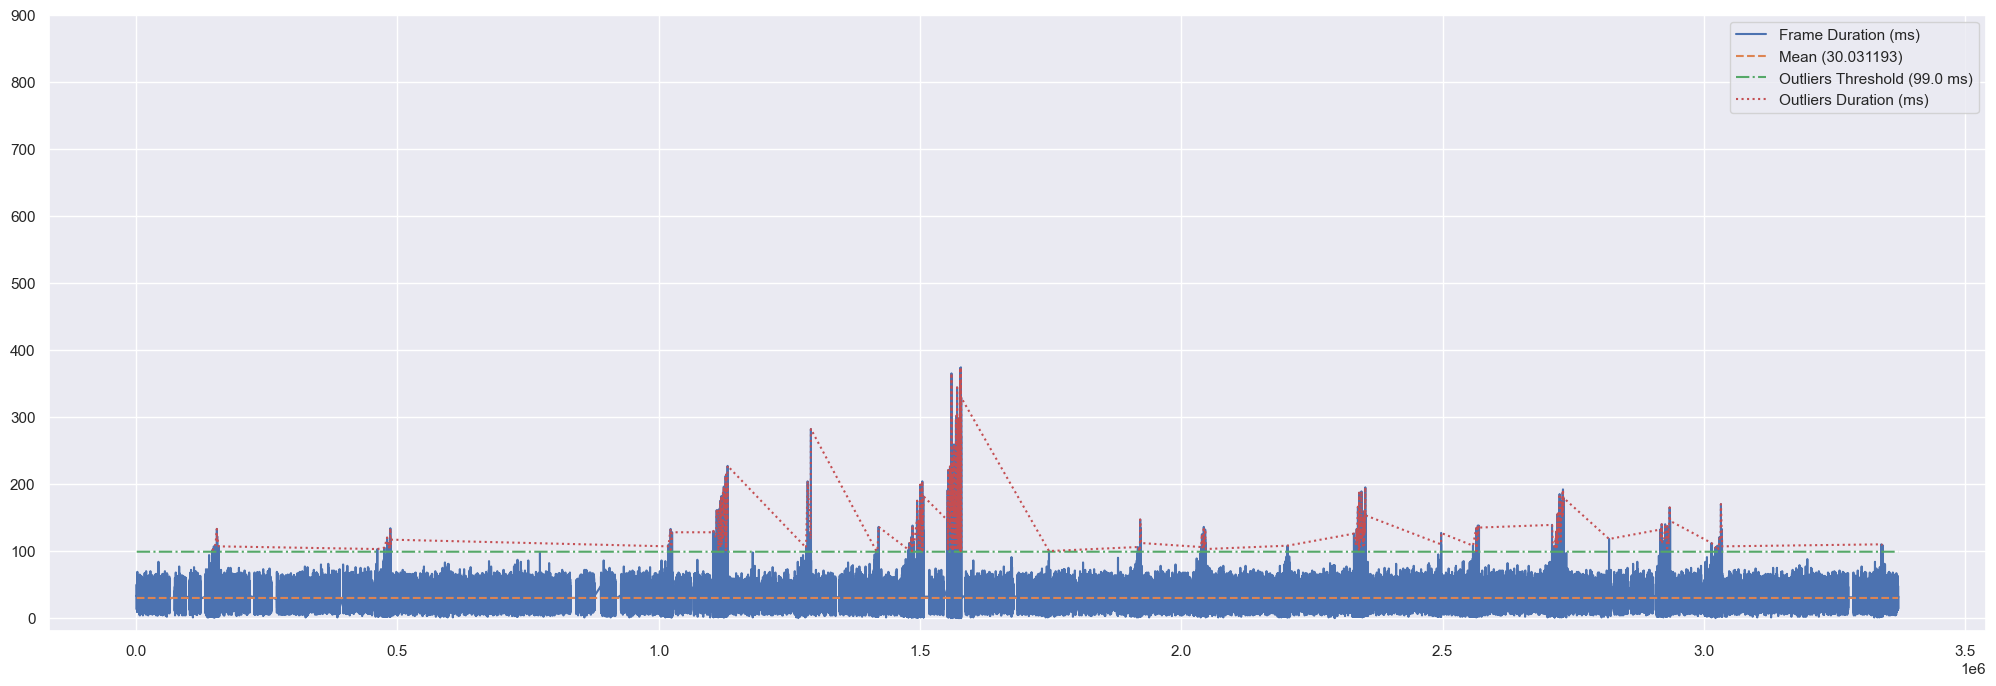

In [15]:
# data_complete['Date'] = pd.to_datetime(data_complete['Date'])

frameStats2 = data_complete[data_complete['ProgramSubState'] == 1]

desc_stats2 = pd.DataFrame(frameStats2['FrameStats'].describe())

display(desc_stats2.apply(lambda s: s.apply('{0:.5f}'.format)))

outliers_threshold = 99.0

outliers = frameStats2[frameStats2["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats2["FrameStats"][1]] * len(frameStats2)
outliers_threshold_line = [outliers_threshold] * len(frameStats2)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats2.index, frameStats2["FrameStats"], label='Frame Duration (ms)')
ax.plot(frameStats2.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats2.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes_interactionOnly.png')
fig.savefig(rf'{export_img}frameTimes_interactionOnly.svg')

plt.show()

